# P1963-computed: A graph recording the properties used in all instances of all classes

Wikidata has a property `properties for this type (P1963)` where editors can manually specify the properties that should be used to describe the instance of a class. 
This property is only defined for a small number of classes, and the properties listed are incomplete. In this use-case we compute the properties used for each class from the instances.

We invent a new property `P1963computed` to record the properties used in the instances of each class. In addition, we compute the counts, which we store as a quailifier `quantity (P1114)`

We compute two variants of these counts:
- `P1963computed` records the properties and counts for the direct instance of a class, includeing `P31x`
- `P1963computed_star` records the properties including the instances of every subclass below a class.

Properties computed in this notebook:
- `P31x`, a generalization of `instance of: P31`, sotred in `derived.P31x.tsv`
- `Pinstance_count`, counts the number of `P31/P31x` instances of a class, in `statistics.Pinstance_count.tsv.gz`
- `Pinstance_count_star`, same as `Pinstance_count`, but includes instances of the subclasses, in `statistics.Pinstance_count.star.tsv.gz`
- `P1963computed` in `derived.class.P1963computed.tsv.gz`
- `P1963computed_star` in `derived.P1963computed.star.tsv.gz`
- `Pproperty_domain` in `derived.Pproperty_domain.tsv.gz`

### `derived.P31x.tsv` contains the union of `P31` and `P31x`:
Below is an example of some of the edges for Arnold Schwarzenegger:

| node1 | label | node2 | id | node1;label | label;label | node2;label |
| -- | -- | -- | -- | -- | -- | -- |
| Q2685 | P31 | Q5 | Q2685-P31-Q5-eb1e33fe-0 | 'Arnold Schwarzenegger'@en | 'instance of'@en | 'human'@en |
| Q2685 | P31x | Q10800557 | Q2685-P31x-Q10800557 | 'Arnold Schwarzenegger'@en |  | 'film actor'@en |
| Q2685 | P31x | Q124100 | Q2685-P31x-Q124100 | 'Arnold Schwarzenegger'@en |  | 'bodybuilding'@en |
| Q2685 | P31x | Q131524 | Q2685-P31x-Q131524 | 'Arnold Schwarzenegger'@en |  | 'entrepreneur'@en |
| Q2685 | P31x | Q5 | Q2685-P31x-Q5 | 'Arnold Schwarzenegger'@en |  | 'human'@en |


### `Pinstance_count` and `Pinstance_count_star` examples

| node1 | label | node2 | id | node1;label |
| -- | -- | -- | -- | -- |
| Q1000017 | Pinstance_count | 1 | Q1000017-Pinstance_count-6b86b2 | 'Brentidae'@en |
| Q1000091 | Pinstance_count | 1 | Q1000091-Pinstance_count-6b86b2 | 'Rychnov nad Kněžnou'@en |
| Q1000156 | Pinstance_count | 11 | Q1000156-Pinstance_count-4fc82b |  |
| Q100023 | Pinstance_count | 1 | Q100023-Pinstance_count-6b86b2 | 'metasyntactic variable'@en |
| Q100026 | Pinstance_count | 1 | Q100026-Pinstance_count-6b86b2 | 'F-16'@en |

| node1 | label | node2 | id | node1;label |
| -- | -- | -- | -- | -- |
| Q1000068 | Pinstance_count_star | 13 | Q1000068-Pinstance_count_star-3fdba3 | 'Planungsverband'@en |
| Q100023 | Pinstance_count_star | 1 | Q100023-Pinstance_count_star-6b86b2 | 'metasyntactic variable'@en |
| Q100026 | Pinstance_count_star | 9 | Q100026-Pinstance_count_star-19581e | 'F-16'@en |
| Q100029091 | Pinstance_count_star | 10 | Q100029091-Pinstance_count_star-4a44dc |  |
| Q1000300 | Pinstance_count_star | 2 | Q1000300-Pinstance_count_star-d4735e | 'Land Rover Series'@en |

### How to use `derived.class.P1963computed.tsv.gz` and `derived.P1963computed.star.tsv.gz`

Here is an example query illustrating how to find the properties for a class, the counts and proportion:
```
kgtk("""
    query -i $OUT/derived.class.P1963computed.count.tsv.gz
        --match '
            (n1:Q100026)-[eid:P1963computed]->(n2), 
            (eid)-[:P1114]->(count),
            (eid)-[:P1107]->(proportion)'
        --return 'distinct n1 as node1, eid.label as label, n2 as node2, count as P1114, proportion as P1107'
        --order-by 'cast(P1114, int) desc'
        --limit 10
    / add-labels
    / md
""")
```
The results:

| node1 | label | node2 | P1114 | P1107 | node1;label | node2;label |
| -- | -- | -- | -- | -- | -- | -- |
| Q100026 | P1963computed | P17 | 1 | 0.015151515151515152 | 'F-16'@en | 'country'@en |
| Q100026 | P1963computed | P18 | 1 | 0.015151515151515152 | 'F-16'@en | 'image'@en |
| Q100026 | P1963computed | P31 | 1 | 0.015151515151515152 | 'F-16'@en | 'instance of'@en |
| Q100026 | P1963computed | P373 | 1 | 0.015151515151515152 | 'F-16'@en | 'Commons category'@en |
| Q100026 | P1963computed | P646 | 1 | 0.015151515151515152 | 'F-16'@en | 'Freebase ID'@en |


Here is the equivalent query on the `derived.P1963computed.star.tsv.gz`
```
kgtk("""
    query -i $OUT/derived.P1963computed.count.star.tsv.gz
        --match '
            (n1:Q100026)-[eid:P1963computed_star]->(n2), 
            (eid)-[:P1114]->(count),
            (eid)-[:P1107]->(proportion)'
        --return 'distinct n1 as node1, eid.label as label, n2 as node2, count as P1114, proportion as P1107'
        --order-by 'cast(P1114, int) desc'
        --limit 10
    / add-labels
    / md
""")
```
Note that there are many more results for the `P1963computed_star` property as it includes the instances of the subclasses of F-16. For example, there are 10 instances of subclassess of F-16 that have a `P31` property, and that is about 15% of all instances of subclasses of F-16, so many don't have a `P31`, which is add:

| node1 | label | node2 | P1114 | P1107 | node1;label | node2;label |
| -- | -- | -- | -- | -- | -- | -- |
| Q100026 | P1963computed_star | P31 | 10 | 0.15151515151515152 | 'F-16'@en | 'instance of'@en |
| Q100026 | P1963computed_star | P361 | 8 | 0.12121212121212122 | 'F-16'@en | 'part of'@en |
| Q100026 | P1963computed_star | P729 | 8 | 0.12121212121212122 | 'F-16'@en | 'service entry'@en |
| Q100026 | P1963computed_star | P426 | 7 | 0.10606060606060606 | 'F-16'@en | 'aircraft registration'@en |
| Q100026 | P1963computed_star | P176 | 6 | 0.09090909090909091 | 'F-16'@en | 'manufacturer'@en |
| Q100026 | P1963computed_star | P730 | 6 | 0.09090909090909091 | 'F-16'@en | 'service retirement'@en |
| Q100026 | P1963computed_star | P137 | 4 | 0.06060606060606061 | 'F-16'@en | 'operator'@en |
| Q100026 | P1963computed_star | P373 | 2 | 0.030303030303030304 | 'F-16'@en | 'Commons category'@en |
| Q100026 | P1963computed_star | P17 | 1 | 0.015151515151515152 | 'F-16'@en | 'country'@en |
| Q100026 | P1963computed_star | P18 | 1 | 0.015151515151515152 | 'F-16'@en | 'image'@en |

### Example of `Pproperty_domain`

Here is a query to get all the domains of `cast member (P161)`
```
kgtk("""
    query -i $OUT/derived.Pproperty_domain.tsv.gz --idx mode:graph
        --match '
            (property:P161)-[edge_id:Pproperty_domain]->(class),
            (edge_id)-[:P1114]->(instance_count),
            (edge_id)-[:P1107]->(proportion)'
        --return 'distinct property as node1, "Pproperty_domain" as label, class as node2, instance_count as P1114, proportion as P1107'
        --order-by 'property, cast(P1114, float)*cast(P1107, float)  desc'
    / add-labels
""")
```

For example, there are 171111 instances of subclasses of film that have cast member, and that is about 54% of all instances of subclasses of film:

| node1 | label | node2 | P1114 | P1107 | node1;label | node2;label |
| -- | -- | -- | -- | -- | -- | -- |
| P161 | Pproperty_domain | Q11424 | 171111 | 0.5425945832818044 | 'cast member'@en | 'film'@en |
| P161 | Pproperty_domain | Q10301427 | 197378 | 0.38757120500167885 | 'cast member'@en | 'moving image'@en |
| P161 | Pproperty_domain | Q79782 | 197379 | 0.3420157510331742 | 'cast member'@en | 'motion'@en |
| P161 | Pproperty_domain | Q17320256 | 197379 | 0.34154997819661803 | 'cast member'@en | 'physical process'@en |
| P161 | Pproperty_domain | Q2431196 | 198160 | 0.3382660960616991 | 'cast member'@en | 'audiovisual work'@en |
| P161 | Pproperty_domain | Q758901 | 198160 | 0.3382649412013731 | 'cast member'@en | 'audiovisual media'@en |
| P161 | Pproperty_domain | Q58898430 | 198160 | 0.33826436377416724 | 'cast member'@en | 'electronic supplementary materials'@en |
| P161 | Pproperty_domain | Q58901077 | 198160 | 0.33826320892566947 | 'cast member'@en | 'publication format'@en |

### Preamble: set up the environment and files used in the tutorial

In [1]:
import io
import os
import subprocess
import sys

import numpy as np
import pandas as pd
import papermill as pm
from graph_tool.all import *
from IPython.display import HTML, display
from kgtk.configure_kgtk_notebooks import ConfigureKGTK
from kgtk.functions import kgtk, kypher

In [2]:
# Parameters

kgtk_path = "/Users/pedroszekely/Documents/GitHub/kgtk"

# Folder on local machine where to create the output and temporary folders
input_path = "/Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215/data/"
input_path = "/Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2/"
output_path = "/Users/pedroszekely/Downloads/kypher/projects"

graph_cache_path = "/Volumes/crucial/wikidata-cache/wikidata.sqlite3.db"

project_name = "p1963"

Tell SQLite to write the temporary files in a specific location where you have a lot of space as this notebook creates huge temporary files (not sure how large, but > 250GB)

In [3]:
os.environ['SQLITE_TMPDIR'] = "/Volumes/crucial/sqlite/temp/"

Our Wikidata distribution partitions the knowledge in Wikidata into smaller files that make it possible for you to pick and choose which files you want to use:

In [4]:
files = [
    "claims",
    "item",
    "datatypes",
    "p279",
    "p279star",
    #"derived.dwd.count"
]
ck = ConfigureKGTK(files, kgtk_path=kgtk_path)
ck.configure_kgtk(input_graph_path=input_path,
                  output_path=output_path,
                  graph_cache_path=graph_cache_path,
                  project_name=project_name,
                  debug=True)

User home: /Users/pedroszekely
Current dir: /Users/pedroszekely/Documents/GitHub/kgtk-tutorial-files/use-cases
KGTK dir: /Users/pedroszekely/Documents/GitHub/kgtk
Use-cases dir: /Users/pedroszekely/Documents/GitHub/kgtk/use-cases


The KGTK setup command defines environment variables for all the files so that you can reuse the Jupyter notebook when you install it on your local machine.

In [5]:
ck.print_env_variables()

GRAPH: /Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2/
EXAMPLES_DIR: /Users/pedroszekely/Documents/GitHub/kgtk/examples
STORE: /Volumes/crucial/wikidata-cache/wikidata.sqlite3.db
OUT: /Users/pedroszekely/Downloads/kypher/projects/p1963
KGTK_LABEL_FILE: /Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2//labels.en.tsv.gz
kgtk: kgtk --debug
TEMP: /Users/pedroszekely/Downloads/kypher/projects/p1963/temp.p1963
kypher: kgtk --debug query --graph-cache /Volumes/crucial/wikidata-cache/wikidata.sqlite3.db
USE_CASES_DIR: /Users/pedroszekely/Documents/GitHub/kgtk/use-cases
KGTK_OPTION_DEBUG: false
KGTK_GRAPH_CACHE: /Volumes/crucial/wikidata-cache/wikidata.sqlite3.db
claims: /Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2//claims.tsv.gz
item: /Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2//claims.wikibase-item.tsv.gz
datatypes: /Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-d

In [6]:
ck.load_files_into_cache()

kgtk --debug query --graph-cache /Volumes/crucial/wikidata-cache/wikidata.sqlite3.db -i "/Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2//claims.tsv.gz" --as claims  -i "/Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2//claims.wikibase-item.tsv.gz" --as item  -i "/Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2//metadata.property.datatypes.tsv.gz" --as datatypes  -i "/Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2//derived.P279.tsv.gz" --as p279  -i "/Volumes/GoogleDrive/Shared drives/KGTK/datasets/wikidata-20210215-dwd-v2//derived.P279star.tsv.gz" --as p279star  --limit 3
[2021-12-17 16:25:30 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     LIMIT ?
  PARAS: [3]
---------------------------------------------
id	node1	label	node2	rank	node2;wikidatatype
P10-P1628-32b85d-7927ece6-0	P10	P1628	"http://www.w3.org/2006/vcar

Specify the indices we want for our files as the queries we do in this notebook are very expensive:
- `claims:` indexed as a graph because we query based on node1, label and node2
- `p279star:` indexed as a monograph because the file has a single property.

In [7]:
!kgtk --debug query -i claims --idx mode:graph -i p279star --idx mode:monograph --limit 5

[2021-12-11 16:02:49 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     LIMIT ?
  PARAS: [5]
---------------------------------------------
[2021-12-11 16:02:49 sqlstore]: CREATE INDEX "graph_1_node1_label_node2_idx" ON "graph_1" ("node1", "label", "node2")
[2021-12-11 16:12:13 sqlstore]: ANALYZE "graph_1_node1_label_node2_idx"
[2021-12-11 16:14:13 sqlstore]: CREATE INDEX "graph_1_label_idx" ON "graph_1" ("label")
[2021-12-11 16:23:51 sqlstore]: ANALYZE "graph_1_label_idx"
[2021-12-11 16:24:29 sqlstore]: CREATE INDEX "graph_1_node2_label_node1_idx" ON "graph_1" ("node2", "label", "node1")
[2021-12-11 16:47:24 sqlstore]: ANALYZE "graph_1_node2_label_node1_idx"
[2021-12-11 16:49:26 sqlstore]: CREATE INDEX "graph_4_node1_label_node2_idx" ON "graph_4" ("node1", "label", "node2")
[2021-12-11 16:50:46 sqlstore]: ANALYZE "graph_4_node1_label_node2_idx"
[2021-12-11 16:51:04 sqlstore]: CREATE INDEX "graph_4_node2_label_node1_idx

In [13]:
!kgtk --debug query -i item --idx mode:graph --limit 5

[2021-12-11 17:26:44 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_5 AS graph_5_c1
     LIMIT ?
  PARAS: [5]
---------------------------------------------
[2021-12-11 17:26:44 sqlstore]: CREATE INDEX "graph_5_node1_label_node2_idx" ON "graph_5" ("node1", "label", "node2")
[2021-12-11 17:30:30 sqlstore]: ANALYZE "graph_5_node1_label_node2_idx"
[2021-12-11 17:31:14 sqlstore]: CREATE INDEX "graph_5_label_idx" ON "graph_5" ("label")
[2021-12-11 17:35:10 sqlstore]: ANALYZE "graph_5_label_idx"
[2021-12-11 17:35:30 sqlstore]: CREATE INDEX "graph_5_node2_label_node1_idx" ON "graph_5" ("node2", "label", "node1")
[2021-12-11 17:42:25 sqlstore]: ANALYZE "graph_5_node2_label_node1_idx"
node1	label	node2	id	rank	node2;wikidatatype
P10	P1629	Q34508	P10-P1629-Q34508-bcc39400-0	normal	wikibase-item
P10	P1855	Q15075950	P10-P1855-Q15075950-7eff6d65-0	normal	wikibase-item
P10	P1855	Q4504	P10-P1855-Q4504-a69d2c73-0	normal	wikibase-item
P10	P1855	Q6906365

In [ ]:
# Example of how to clear the indices and reindex
# !kgtk --debug query -i claims --idx mode:clear mode:graph -i p279star --idx mode:clear mode:monograph --limit 5

## Define `P31x`, a generalization of `instance of: P31`

In our KG we are going to define a new property called `instance of (generalized): P31x` that behaves like DBpedia, so that we can ask for instances of `artist: Q483501`.
We do this by generalizing `occupation: P106` abd `position held: 39` to also behave as `P31` statements.

Approach:
- Combine `x P31 y`, `x P106 y` and `x P39 y` statements using a new `P31x` predicate

In [ ]:
kgtk("""
    query -i claims
        --match '
            (n1)-[:P31]->(:Q5),
            (n1)-[r {label: property}]->(n2)'
        --where 'property in ["P106", "P39", "P31"]'
        --return 'distinct n1 as node1, "P31x" as label, n2 as node2'
    / add-id --id-style wikidata
    / cat -i - -i "$p31"
    / compact
    -o $OUT/derived.P31x.tsv.gz
""")

Load the `p31x` graph defining our generalized `instance of` property:

In [16]:
kgtk("""
    query -i $OUT/derived.P31x.tsv.gz --as p31x --limit 2
""")

,node1,label,node2,id
0,P10,P31,Q18610173,P10-P31-Q18610173-85ef4d24-0
1,P1000,P31,Q18608871,P1000-P31-Q18608871-093affb5-0


In [39]:
kgtk("query -i p31x --match '(:Q2685)-[edgeid]->(n2)' / head -n 14 / add-labels / md")

| node1 | label | node2 | id | node1;label | label;label | node2;label |
| -- | -- | -- | -- | -- | -- | -- |
| Q2685 | P31 | Q5 | Q2685-P31-Q5-eb1e33fe-0 | 'Arnold Schwarzenegger'@en | 'instance of'@en | 'human'@en |
| Q2685 | P31x | Q10800557 | Q2685-P31x-Q10800557 | 'Arnold Schwarzenegger'@en |  | 'film actor'@en |
| Q2685 | P31x | Q124100 | Q2685-P31x-Q124100 | 'Arnold Schwarzenegger'@en |  | 'bodybuilding'@en |
| Q2685 | P31x | Q131524 | Q2685-P31x-Q131524 | 'Arnold Schwarzenegger'@en |  | 'entrepreneur'@en |
| Q2685 | P31x | Q13235160 | Q2685-P31x-Q13235160 | 'Arnold Schwarzenegger'@en |  | 'producer'@en |
| Q2685 | P31x | Q18814623 | Q2685-P31x-Q18814623 | 'Arnold Schwarzenegger'@en |  | 'autobiographer'@en |
| Q2685 | P31x | Q23845879 | Q2685-P31x-Q23845879 | 'Arnold Schwarzenegger'@en |  | 'powerlifter'@en |
| Q2685 | P31x | Q2526255 | Q2685-P31x-Q2526255 | 'Arnold Schwarzenegger'@en |  | 'film director'@en |
| Q2685 | P31x | Q3282637 | Q2685-P31x-Q3282637 | 'Arnold Schwarzene

## Instance Counts

In [39]:
kgtk("""
    query -i p31x
        --match '(instance)-[]->(class)'
        --return 'distinct class as node1, "Pinstance_count" as label, count(distinct instance) as node2'
        --order-by 'class'
    / add-id --id-style wikidata
    -o $OUT/statistics.Pinstance_count.tsv.gz
""")

In [65]:
kgtk("head -i $OUT/statistics.Pinstance_count.tsv.gz -n 5 / add-labels / md")

| node1 | label | node2 | id | node1;label |
| -- | -- | -- | -- | -- |
| Q1000017 | Pinstance_count | 1 | Q1000017-Pinstance_count-6b86b2 | 'Brentidae'@en |
| Q1000091 | Pinstance_count | 1 | Q1000091-Pinstance_count-6b86b2 | 'Rychnov nad Kněžnou'@en |
| Q1000156 | Pinstance_count | 11 | Q1000156-Pinstance_count-4fc82b |  |
| Q100023 | Pinstance_count | 1 | Q100023-Pinstance_count-6b86b2 | 'metasyntactic variable'@en |
| Q100026 | Pinstance_count | 1 | Q100026-Pinstance_count-6b86b2 | 'F-16'@en |



In [59]:
!kgtk --debug query -i $OUT/statistics.Pinstance_count.tsv.gz --as p31xcount --idx mode:graph --limit 3

[2021-12-12 15:29:09 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_8 AS graph_8_c1
     LIMIT ?
  PARAS: [3]
---------------------------------------------
[2021-12-12 15:29:09 sqlstore]: CREATE INDEX "graph_8_node1_label_node2_idx" ON "graph_8" ("node1", "label", "node2")
[2021-12-12 15:29:10 sqlstore]: ANALYZE "graph_8_node1_label_node2_idx"
[2021-12-12 15:29:16 sqlstore]: CREATE INDEX "graph_8_node2_label_node1_idx" ON "graph_8" ("node2", "label", "node1")
[2021-12-12 15:29:17 sqlstore]: ANALYZE "graph_8_node2_label_node1_idx"
node1	label	node2	id
Q1000017	Pinstance_count	1	Q1000017-Pinstance_count-6b86b2
Q1000091	Pinstance_count	1	Q1000091-Pinstance_count-6b86b2
Q1000156	Pinstance_count	11	Q1000156-Pinstance_count-4fc82b


In [63]:
kgtk("""
    query -i p31x -i p279star
        --match '
            p31x: (instance)-[]->(hop),
            p279star: (hop)-[]->(class)'
        --return 'distinct class as node1, "Pinstance_count_star" as label, count(distinct instance) as node2'
        --order-by 'class'
    / add-id --id-style wikidata
    -o $OUT/statistics.Pinstance_count.star.tsv.gz
""")

In [67]:
!kgtk --debug query -i $OUT/statistics.Pinstance_count.star.tsv.gz --as p31xcountstar --idx mode:graph --limit 3

[2021-12-22 21:20:07 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_23 AS graph_23_c1
     LIMIT ?
  PARAS: [3]
---------------------------------------------
node1	label	node2	id
Q1000068	Pinstance_count_star	13	Q1000068-Pinstance_count_star-3fdba3
Q100023	Pinstance_count_star	1	Q100023-Pinstance_count_star-6b86b2
Q100026	Pinstance_count_star	9	Q100026-Pinstance_count_star-19581e


In [68]:
kgtk("head -i $OUT/statistics.Pinstance_count.star.tsv.gz -n 5 / add-labels / md")

| node1 | label | node2 | id | node1;label |
| -- | -- | -- | -- | -- |
| Q1000068 | Pinstance_count_star | 13 | Q1000068-Pinstance_count_star-3fdba3 | 'Planungsverband'@en |
| Q100023 | Pinstance_count_star | 1 | Q100023-Pinstance_count_star-6b86b2 | 'metasyntactic variable'@en |
| Q100026 | Pinstance_count_star | 9 | Q100026-Pinstance_count_star-19581e | 'F-16'@en |
| Q100029091 | Pinstance_count_star | 10 | Q100029091-Pinstance_count_star-4a44dc |  |
| Q1000300 | Pinstance_count_star | 2 | Q1000300-Pinstance_count_star-d4735e | 'Land Rover Series'@en |



## Compute the number of times each property appears in a class

In this section we will compute the distribution of the use of properties in every class in th KG. 
We want to know the count of the different properties used in all instance of a class.
For example, if we look at `film (Q11424)` we want to see what properties are used to describe films, including all subclasses of film.

Computing this distribution is challenging because we want to include the instances of subclasses, and class hierarchy in Wikidata is ver large.

Approach:
- Compute a graph that represents the properties used to describe an entity. We will use `Phas_property` to record the properties used in each entity.
- Aggregate the counts over all the instances of a class, inlcuding instances of the subclasses.
  - Exact method: forl each class, enumerate all the subclasses, and for each subclass enumerate all its intances, and then count the ocurrences of the properties. The exact method works for small graphs, but for DWD (Wikidata scale), the exact method will not return a result even after 2 days.
  - Approximate method: 
    - Count the distribution of properties for all instances of a class, not including subclasses
    - For every class, sum the property counts over the direct children of the class. This is a recursive definition, as we need to calculate the sum for the children before that we can aggregate up to the paprent. KGTK does not support recursive queries, so we will do this in a dumb way, so for every class we add the number of all the subclasses and below
    
  > The parent/child implementation of the approximate method is approximate because we may overcount classes: given classes `A` and `B` such that `A` is below `B`, if there are multiple distinct paths from `A` to `B`, we will double count. The advantage of the dumb method is that it does not double-count

### Compute the `Phas_property`, the set of properties used in each entity

In [ ]:
kgtk("""
    query -i p31x -i claims
        --match '
            p31x: (entity)-[]->(),
            claims: (entity)-[l {label: property}]->()'
        --return 'distinct entity as node1, "Phas_property" as label, property as node2'
    / add-id --id-style wikidata
    -o $TEMP/item_properties.tsv.gz
""")

Show the results for `Terminator 2: Judgment Day (Q170564)`

### Compute `P1963computed`

For every class record the count of each property in all instances of the class according to the `P131x` graph which contains the `P131x` and `P131` statements.

In [ ]:
kgtk("""
    query -i p31x -i $TEMP/item_properties.tsv.gz
        --match '  
            p31x: (entity)-[]->(class),
            item_properties: (entity)-[l]->(property)'
        --return 'distinct class as node1, "P1963computed" as label, property as node2, count(distinct l) as P1114' 
    / add-id --id-style wikidata
    / normalize --add-id True
    -o $OUT/derived.class.P1963computed.tsv.gz
""")

Calculate the proportion of instances of a class that have each property, recording the proportion using property `proportion (P1107)`

In [49]:
kgtk("""
    query -i $OUT/derived.class.P1963computed.tsv.gz -i "$GRAPH"/derived.dwd.count.tsv.gz
        --match '
            computed:
                (class)-[edge_id:P1963computed]->(property),
                (edge_id)-[:P1114]->(property_count),
            count:
                (class)-[]->(instance_count)'
        --return 'edge_id as node1, "P1107" as label, cast(property_count, float)/cast(instance_count, float) as node2'
    / add-id --id-style wikidata
    / cat -i - -i $OUT/derived.class.P1963computed.tsv.gz
    / sort
    -o $OUT/derived.class.P1963computed.count.tsv.gz
""")

In the second step, we use `P279star` to iterate over all classes, finding all subclasses below each superclass, and we sum the counts for the properties.


In the return clause, we list `superclass`, and the value of the `property` variable ahead of the `count` clause to tell KGTK that we want to aggregate by superclass and property. We reuse the Wikidata `quantity (P1114)` to record the counts:

In [ ]:
kgtk("""
    query -i $OUT/derived.class.P1963computed.tsv.gz -i p279star \
    --match ' 
        P1963computed: 
            (class)-[edge_id]->(property), 
            (edge_id)-[:P1114]->(count),
        p279star: 
            (class)-[:P279star]->(superclass)' 
    --return 'distinct superclass as node1, "P1963computed_star" as label, property as node2, sum(count) as P1114'
    / add-id --id-style wikidata
    / normalize --add-id True
    -o "$OUT"/derived.P1963computed.star.tsv.gz
""")
#

The following query claculates `P1963computed_x` in one go, by counting over all instances of all sublasses of each superclass. This query is too expensive: it will not complete after 2 days when running on DWD.

Calculate the proportion of instances of a class that have each property, recording the proportion using property `proportion (P1107)`

In [ ]:
kgtk("""
    query -i $OUT/derived.P1963computed.star.tsv.gz -i "$GRAPH"/derived.dwd.count.tsv.gz
        --match '
            computed:
                (class)-[edge_id:P1963computed_star]->(property),
                (edge_id)-[:P1114]->(property_count),
            count:
                (class)-[]->(instance_count)'
        --return 'edge_id as node1, "P1107" as label, cast(property_count, float)/cast(instance_count, float) as node2'
    / add-id --id-style wikidata
    / cat -i - -i $OUT/derived.P1963computed.star.tsv.gz
    / sort
    -o $OUT/derived.P1963computed.count.star.tsv.gz
""")

Show part of the files, compute the tables to put at the top of the notebook:

In [60]:
kgtk("""
    query -i $OUT/derived.class.P1963computed.count.tsv.gz
        --match '
            (n1:Q100026)-[eid:P1963computed]->(n2), 
            (eid)-[:P1114]->(count),
            (eid)-[:P1107]->(proportion)'
        --return 'distinct n1 as node1, eid.label as label, n2 as node2, count as P1114, proportion as P1107'
        --order-by 'cast(P1114, int) desc'
        --limit 10
    / add-labels
    / md
""")

| node1 | label | node2 | P1114 | P1107 | node1;label | node2;label |
| -- | -- | -- | -- | -- | -- | -- |
| Q100026 | P1963computed | P17 | 1 | 0.015151515151515152 | 'F-16'@en | 'country'@en |
| Q100026 | P1963computed | P18 | 1 | 0.015151515151515152 | 'F-16'@en | 'image'@en |
| Q100026 | P1963computed | P31 | 1 | 0.015151515151515152 | 'F-16'@en | 'instance of'@en |
| Q100026 | P1963computed | P373 | 1 | 0.015151515151515152 | 'F-16'@en | 'Commons category'@en |
| Q100026 | P1963computed | P646 | 1 | 0.015151515151515152 | 'F-16'@en | 'Freebase ID'@en |



In [61]:
kgtk("""
    query -i $OUT/derived.P1963computed.count.star.tsv.gz
        --match '
            (n1:Q100026)-[eid:P1963computed_star]->(n2), 
            (eid)-[:P1114]->(count),
            (eid)-[:P1107]->(proportion)'
        --return 'distinct n1 as node1, eid.label as label, n2 as node2, count as P1114, proportion as P1107'
        --order-by 'cast(P1114, int) desc'
        --limit 10
    / add-labels
    / md
""")

| node1 | label | node2 | P1114 | P1107 | node1;label | node2;label |
| -- | -- | -- | -- | -- | -- | -- |
| Q100026 | P1963computed_star | P31 | 10 | 0.15151515151515152 | 'F-16'@en | 'instance of'@en |
| Q100026 | P1963computed_star | P361 | 8 | 0.12121212121212122 | 'F-16'@en | 'part of'@en |
| Q100026 | P1963computed_star | P729 | 8 | 0.12121212121212122 | 'F-16'@en | 'service entry'@en |
| Q100026 | P1963computed_star | P426 | 7 | 0.10606060606060606 | 'F-16'@en | 'aircraft registration'@en |
| Q100026 | P1963computed_star | P176 | 6 | 0.09090909090909091 | 'F-16'@en | 'manufacturer'@en |
| Q100026 | P1963computed_star | P730 | 6 | 0.09090909090909091 | 'F-16'@en | 'service retirement'@en |
| Q100026 | P1963computed_star | P137 | 4 | 0.06060606060606061 | 'F-16'@en | 'operator'@en |
| Q100026 | P1963computed_star | P373 | 2 | 0.030303030303030304 | 'F-16'@en | 'Commons category'@en |
| Q100026 | P1963computed_star | P17 | 1 | 0.015151515151515152 | 'F-16'@en | 'country'@en |
| Q10

Create a report of the property counts

In [79]:
kgtk("""
    query -i $OUT/derived.P1963computed.count.star.tsv.gz
        --match '
            (class)-[edge_id]->(property),
            (edge_id)-[:P1114]->(instance_count),
            (edge_id)-[:P1107]->(proportion)'
        --return '
            class as class,
            property as property,
            instance_count as instance_count,
            proportion as proportion'
        --order-by 'class, cast(proportion, float) desc, property'
    / add-labels --mode=NONE
    -o $OUT/P1963.report.tsv.gz
""")

Exception in thread background thread for pid 65882:
Traceback (most recent call last):
  File "/Users/pedroszekely/opt/anaconda3/envs/kgtk/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/pedroszekely/opt/anaconda3/envs/kgtk/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/pedroszekely/opt/anaconda3/envs/kgtk/lib/python3.8/site-packages/sh.py", line 1683, in wrap
    fn(*rgs, **kwargs)
  File "/Users/pedroszekely/opt/anaconda3/envs/kgtk/lib/python3.8/site-packages/sh.py", line 2662, in background_thread
    handle_exit_code(exit_code)
  File "/Users/pedroszekely/opt/anaconda3/envs/kgtk/lib/python3.8/site-packages/sh.py", line 2349, in fn
    return self.command.handle_command_exit_code(exit_code)
  File "/Users/pedroszekely/opt/anaconda3/envs/kgtk/lib/python3.8/site-packages/sh.py", line 905, in handle_command_exit_code
    raise exc
sh.ErrorReturnCode_2: 

  RAN: /bin/bash -c 'kgtk      

No label match column specified and not an edge or node file.



In [77]:
!kgtk head -i $OUT/P1963.report.tsv.gz

class	property	property_count	proportion	class;label	property;label
Q1000068	P31	13	1.0	'Planungsverband'@en	'instance of'@en
Q100023	P1343	1	1.0	'metasyntactic variable'@en	'described by source'@en
Q100023	P31	1	1.0	'metasyntactic variable'@en	'instance of'@en
Q100023	P3417	1	1.0	'metasyntactic variable'@en	'Quora topic ID'@en
Q100023	P6366	1	1.0	'metasyntactic variable'@en	'Microsoft Academic ID'@en
Q100023	P646	1	1.0	'metasyntactic variable'@en	'Freebase ID'@en
Q100026	P31	10	0.15151515151515152	'F-16'@en	'instance of'@en
Q100026	P361	8	0.12121212121212122	'F-16'@en	'part of'@en
Q100026	P729	8	0.12121212121212122	'F-16'@en	'service entry'@en
Q100026	P426	7	0.10606060606060606	'F-16'@en	'aircraft registration'@en


## Compute `Pproperty_domain` that maps properties to the classes whose instances use the property

In [72]:
kgtk("""
    query -i $OUT/derived.P1963computed.count.star.tsv.gz --idx mode:graph
        --match '
            (class)-[edge_id:P1963computed_star]->(property),
            (edge_id)-[:P1114]->(instance_count),
            (edge_id)-[:P1107]->(proportion)'
        --return 'distinct property as node1, "Pproperty_domain" as label, class as node2, instance_count as P1114, proportion as P1107'
        --order-by 'property, cast(P1114, int) desc'
    / add-id --id-style wikidata
    / normalize --add-id True
    -o $OUT/derived.Pproperty_domain.tsv.gz
""")

Example showing the domain of `cast member (P161)`. 
Ordering by the product of the count and proportion gives a more nuanced view of the important classes.

In [86]:
kgtk("""
    query -i $OUT/derived.Pproperty_domain.tsv.gz --idx mode:graph
        --match '
            (property:P161)-[edge_id:Pproperty_domain]->(class),
            (edge_id)-[:P1114]->(instance_count),
            (edge_id)-[:P1107]->(proportion)'
        --return 'distinct property as node1, "Pproperty_domain" as label, class as node2, instance_count as P1114, proportion as P1107'
        --order-by 'property, cast(P1114, float)*cast(P1107, float)  desc'
        --limit 12
    / add-labels
    / md
""")

| node1 | label | node2 | P1114 | P1107 | node1;label | node2;label |
| -- | -- | -- | -- | -- | -- | -- |
| P161 | Pproperty_domain | Q11424 | 171111 | 0.5425945832818044 | 'cast member'@en | 'film'@en |
| P161 | Pproperty_domain | Q10301427 | 197378 | 0.38757120500167885 | 'cast member'@en | 'moving image'@en |
| P161 | Pproperty_domain | Q79782 | 197379 | 0.3420157510331742 | 'cast member'@en | 'motion'@en |
| P161 | Pproperty_domain | Q17320256 | 197379 | 0.34154997819661803 | 'cast member'@en | 'physical process'@en |
| P161 | Pproperty_domain | Q2431196 | 198160 | 0.3382660960616991 | 'cast member'@en | 'audiovisual work'@en |
| P161 | Pproperty_domain | Q758901 | 198160 | 0.3382649412013731 | 'cast member'@en | 'audiovisual media'@en |
| P161 | Pproperty_domain | Q58898430 | 198160 | 0.33826436377416724 | 'cast member'@en | 'electronic supplementary materials'@en |
| P161 | Pproperty_domain | Q58901077 | 198160 | 0.33826320892566947 | 'cast member'@en | 'publication format'@en |

## Construct a class-to-class graph where classes are connected if their instances share many properties

This is an exploration to see if we can use `P1963computed` to figure out relationships among classes.

In [ ]:
kgtk("""
    query -i $OUT/derived.P1963computed.count.star.tsv.gz
        --match '
            (class)-[edge_id]->(property),
            (edge_id)-[:P1107]->(proportion)'
        --where 'cast(proportion, float) > 0.5 and property != "P31" and property != "P279" '
        --return 'distinct class as node1, property as node2, "property" as label'
    -o $TEMP/P1963computed.prevalent.tsv.gz
""")

In [ ]:
kgtk("""
    query -i $TEMP/P1963computed.prevalent.tsv.gz
        --match '(class1)-[]->(property), (class2)-[]->(property)'
        --where 'class1 > class2'
        --return 'distinct class1 as node1, "link" as label, class2 as node2, count(distinct property) as P1114'
    -o $TEMP/P1963.graph.tsv.gz
""")

The resulting graph as `6,338,684,335` edges, which is too large, likely caused by links that appear only once. The computation took 1 day and 11 hours.

In [ ]:
kgtk("""
    add-id -i $TEMP/P1963.graph.tsv.gz 
        --verify-id-unique=false 
    -o $TEMP/P1963.graph.id.tsv.gz
""")

In [ ]:
kgtk("""
    query -i $TEMP/P1963.graph.id.tsv.gz 
        --match '
            (class1)-[edgeid {P1114: quantity}]->(class2)'
        --return 'quantity as node1, "count_distribution" as label, count(distinct edgeid) as node2'
        --order-by 'cast(node2, int) desc'
    -o $TEMP/P1963.count.distribution.tsv
""")

It is surprising that the largest counts are 6, 6 and 5. I expected 1 to be the largest. Also, the distribution is fairly smooth, which I didn't expect either.

In [33]:
kgtk("head -i $TEMP/P1963.count.distribution.tsv -n 100")

,node1,label,node2
0,7,count_distribution,3091574451
1,6,count_distribution,795134290
2,5,count_distribution,653288072
3,1,count_distribution,617026970
4,4,count_distribution,416489033
...,...,...,...
95,104,count_distribution,36
96,112,count_distribution,30
97,90,count_distribution,30
98,93,count_distribution,30


## Visualize the graph

In [ ]:
kgtk("""
    query -i $TEMP/P1963.graph.tsv.gz 
        --match '
            (class1)-[edgeid {P1114: quantity}]->(class2)'
        --return 'distinct class1 as node1, "link" as label, class2 as node2, quantity as P1114'
        --where 'cast(quantity, int) > 9'
    -o $OUT/P1963.graph.10.tsv.gz
""")

Try loading the large graph in its own cache

In [10]:
kgtk("""
    query -i $TEMP/P1963.graph.id.tsv.gz --idx mode:none --graph-cache /Volumes/crucial/wikidata-cache/p1963.sqlite3.db
        --match '
            (class1)-[edgeid {P1114: quantity}]->(class2)'
        --return 'distinct class1 as node1, "link" as label, class2 as node2, quantity as P1114, edgeid as id'
        --where 'cast(quantity, int) > 9'
    -o $OUT/P1963.graph.10.tsv.gz
""")

In [11]:
kgtk("""
    connected-components -i $OUT/P1963.graph.10.tsv.gz -o $OUT/P1963.graph.10.components.tsv.gz
""")

Look at the components. We have a large component and many thousands of isolated islands.

In [12]:
kgtk("""
    unique -i $OUT/P1963.graph.10.components.tsv.gz -c node2
    / sort -c node2 --numeric True --reverse True
""")

,node1,label,node2
0,CLUSB2cQvRcVJs48uwsDf88O9A==,count,25205
1,CLUSLduCj+ldxR+0pdbiwXWWLQ==,count,154
2,CLUSXbunAW5/RkzX8ZwUMDmDrA==,count,139
3,CLUSP0Y7bzRBAHLkxrWdm8ztVw==,count,87
4,CLUSf2XXd5GQPRv31AyzhaTL/w==,count,43
...,...,...,...
137,CLUS0bJak+kUzlWdN7s1ws9r0w==,count,2
138,CLUS0VdH8X1rDg2zlxtl1NVj8Q==,count,2
139,CLUS/sTxb4UzxVCF8V88rFMSKw==,count,2
140,CLUS/jGphi5PLvMJGQ8otyqeYw==,count,2


In [13]:
kgtk("""
    query -i $OUT/P1963.graph.10.components.tsv.gz
        --match '
            (item)-[]->(:`CLUSB2cQvRcVJs48uwsDf88O9A==`)'
        --return 'distinct item as node1'
    -o $TEMP/large-connected-component.tsv.gz
""")

In [14]:
kgtk("""
    query -i $TEMP/large-connected-component.tsv.gz -i $OUT/P1963.graph.10.tsv.gz
        --match '
            P1963: (n1)-[l]->(n2),
            connected: (n1),
            connected: (n2)'
        --return 'distinct n1 as node1, l.label as label, n2 as node2, l as id'
    -o $TEMP/large-cluster.graph.tsv.gz
""")

In [15]:
!kgtk export-gt -i $TEMP/large-cluster.graph.tsv.gz  -o $TEMP/large-cluster.graph.gt

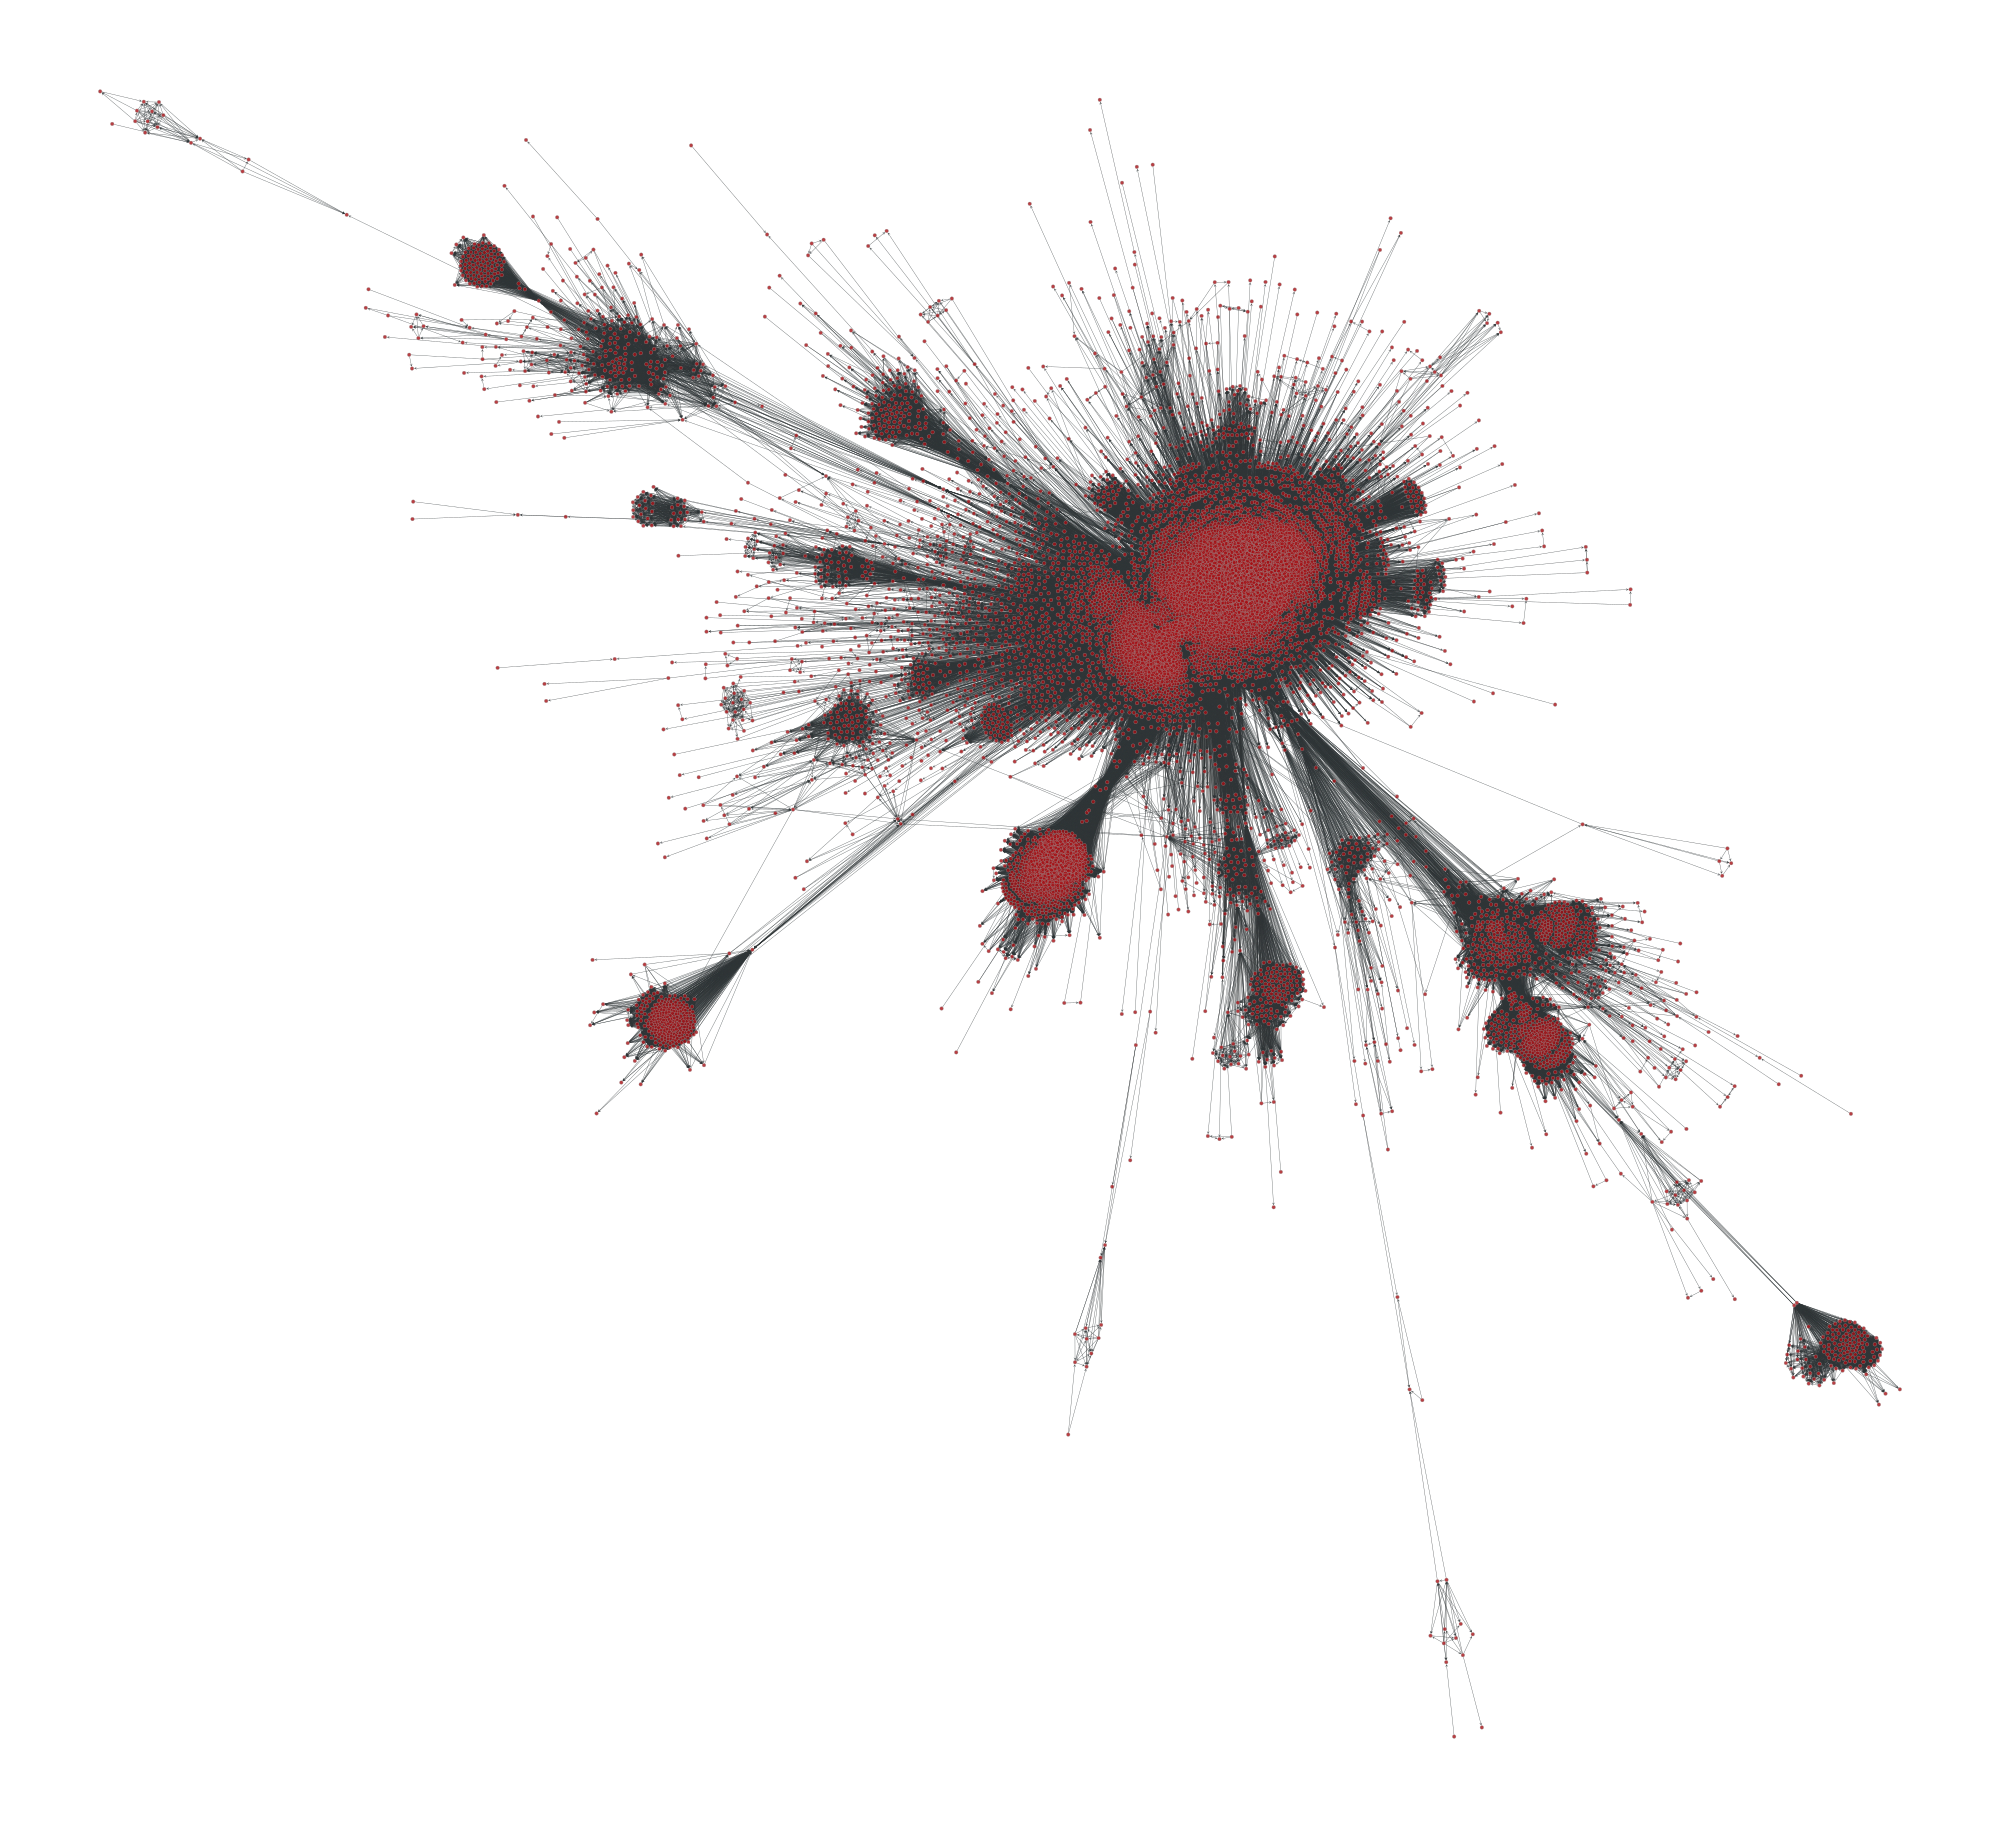

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9858788100, at 0x7f985879b430>

In [16]:
path = os.environ["TEMP"] + "/large-cluster.graph.gt"
g = load_graph(path)

pos = sfdp_layout(g)
graph_draw(g, pos=pos, output_size=(1000, 1000))

In [ ]:
!kgtk export-gt -i $OUT/P1963.graph.10.tsv.gz  -o $OUT/P1963.graph.10.gt

In [ ]:
path = os.environ["OUT"] + "/P1963.graph.10.gt"
g = load_graph(path)

pos = sfdp_layout(g)
graph_draw(g, pos=pos, output_size=(1000, 1000))

In [ ]:
path = os.environ["OUT"] + "/P1963.graph.15.gt"
g = load_graph(path)

pos = sfdp_layout(g)
graph_draw(g, pos=pos, output_size=(1000, 1000))